In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("/content/sample_data/IRIS.csv")

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print(df.species.unique())
df['species'] = df['species'].apply(lambda x: x.split("-")[1])
print(df['species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
['setosa' 'versicolor' 'virginica']


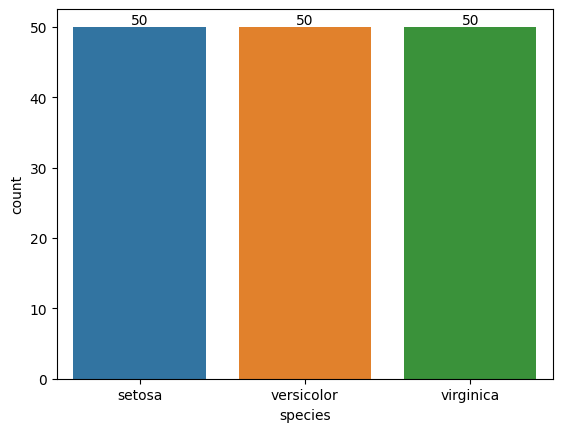

In [ ]:
ax = sns.countplot(data=df, x='species')
for bar in ax.containers:
  ax.bar_label(bar)

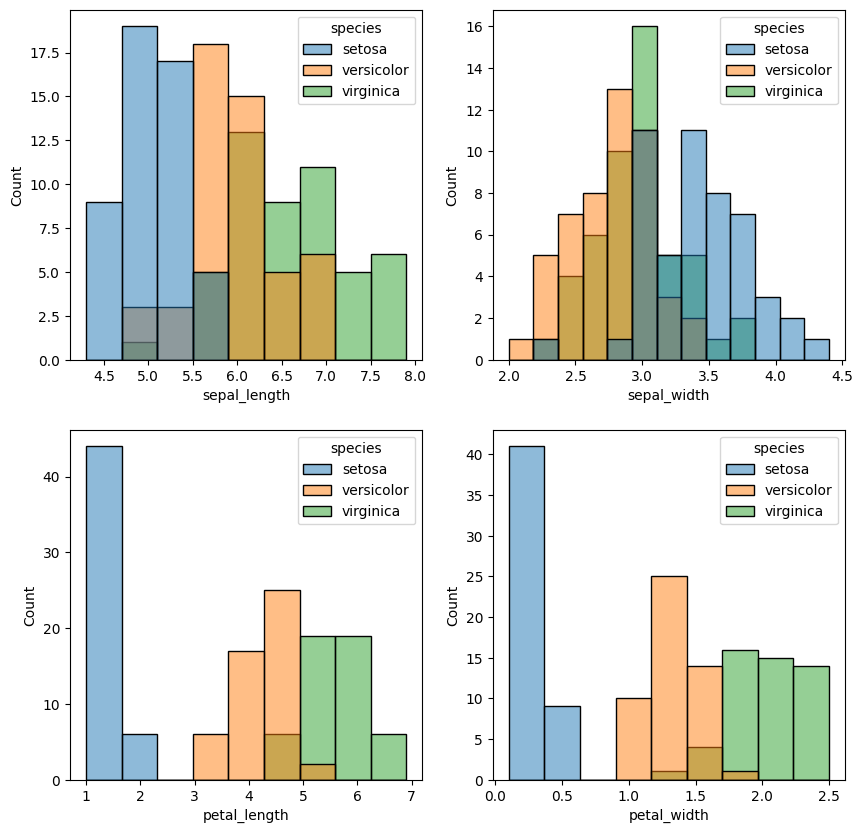

In [ ]:
fix, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(10, 10))
sns.histplot(ax=ax1, data=df, x='sepal_length', kde=False, hue='species')
sns.histplot(ax=ax2, data=df, x='sepal_width', kde=False, hue='species')
sns.histplot(ax=ax3, data=df, x='petal_length', kde=False, hue='species')
ax = sns.histplot(ax=ax4, data=df, x='petal_width', kde=False, hue='species')

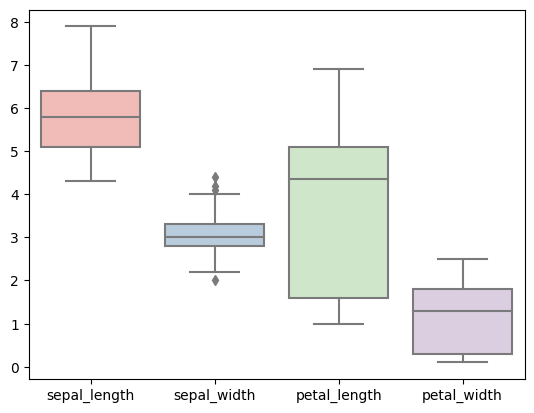

In [ ]:
ax = sns.boxplot(df, palette='Pastel1')

In [ ]:
px.scatter(df, x='sepal_length', y='sepal_width', color="species", size='sepal_length')

In [ ]:
px.scatter(df, x='petal_length', y='petal_width', color="species", size='petal_length')

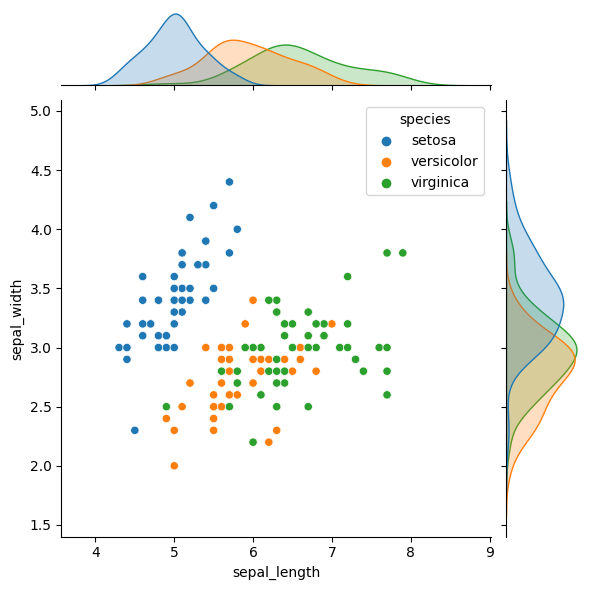

In [ ]:
ax = sns.jointplot(df, x='sepal_length', y='sepal_width', hue='species')

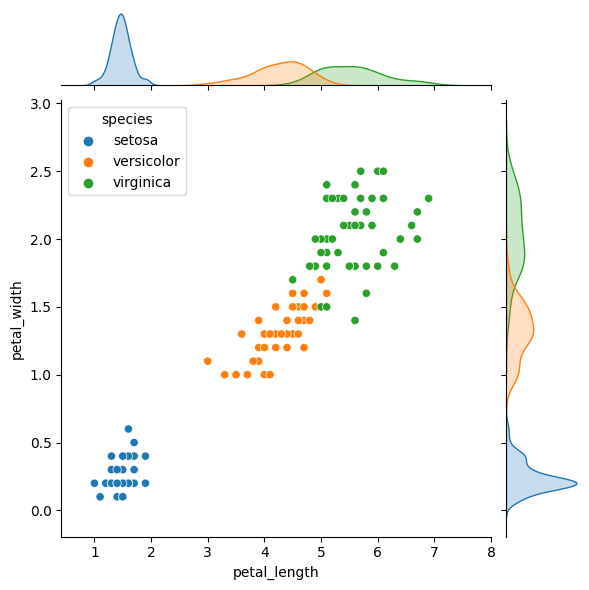

In [ ]:
ax = sns.jointplot(df, x='petal_length', y='petal_width', hue='species')

In [ ]:
px.scatter_3d(df, x='sepal_length', y='sepal_width', z='species', color='species')

In [ ]:
px.scatter_3d(df, x='petal_length', y='petal_width', z='species', color='species')

In [ ]:
df.species.replace("setosa", 0, inplace=True)
df.species.replace("versicolor", 1, inplace=True)
df.species.replace("virginica", 2, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


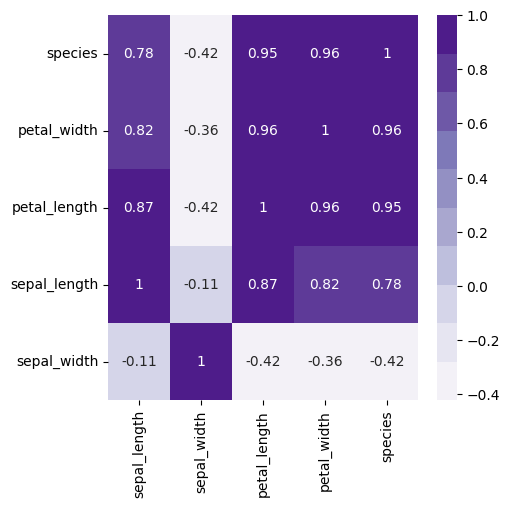

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(df.corr().sort_values(by=['species'], ascending=False, key=abs),
                 cmap=sns.color_palette("Purples", 10), annot=True)

In [ ]:
x = df.drop('species', axis=1)
y = df['species']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.17, random_state=42)

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)
print(f"Accuracy in train: {log_model.score(x_train, y_train)*100:.2f}")
print(f"Accuracy in test: {log_model.score(x_test, y_test)*100:.2f}")

Accuracy in train: 97.58
Accuracy in test: 100.00


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
print(f"Accuracy in train: {dt_model.score(x_train, y_train)*100:.2f}")
print(f"Accuracy in test: {dt_model.score(x_test, y_test)*100:.2f}")

Accuracy in train: 100.00
Accuracy in test: 100.00


In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
print(f"Accuracy in train: {rf_model.score(x_train, y_train)*100:.2f}")
print(f"Accuracy in test: {rf_model.score(x_test, y_test)*100:.2f}")

Accuracy in train: 100.00
Accuracy in test: 100.00
